In [10]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

## Gamma Correction

In [11]:
def gamma_correction(img, gamma):
    lookUpTable = np.empty((1,256), np.uint8)
    for i in range(256):
        lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    res = cv.LUT(img, lookUpTable)

    return res

In [21]:
img = cv.cvtColor(cv.imread('flower.jpg'), cv.COLOR_BGR2RGB)

img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
gamma = 0.8
img_gamma = gamma_correction(img_gray, gamma)

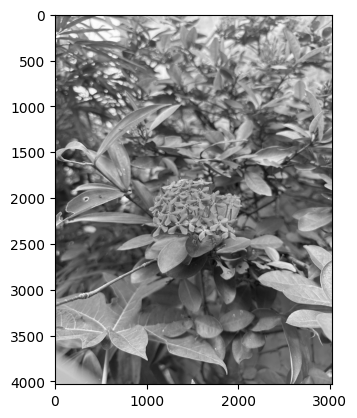

In [13]:
plt.imshow(img_gray, cmap='gray')
plt.show()

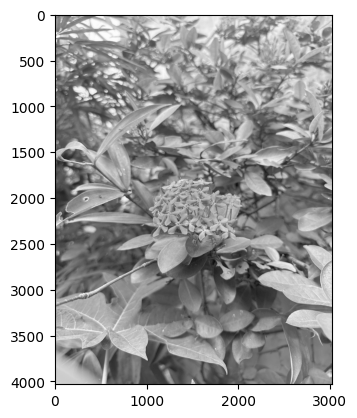

In [22]:
plt.imshow(img_gamma, cmap='gray')
plt.show()

## Histogram Equalization

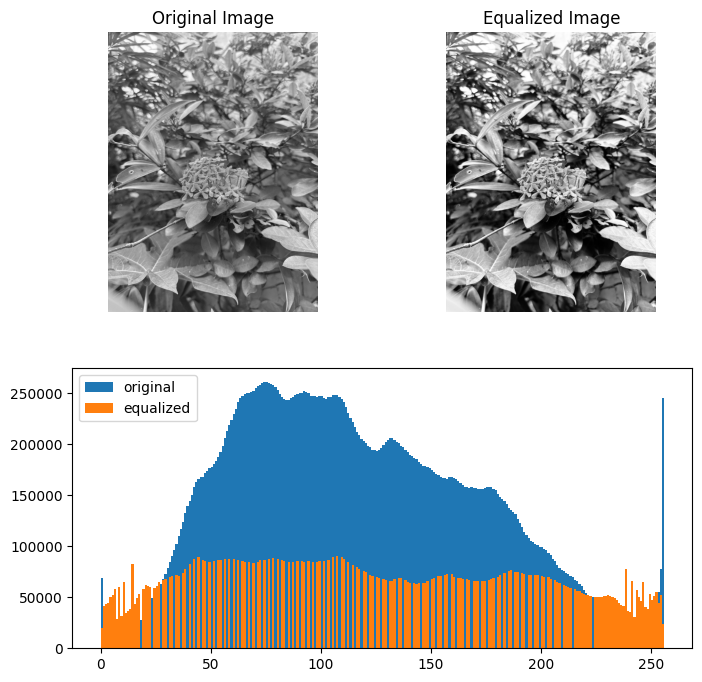

In [23]:
## Grayscale

img_hiseq = cv.equalizeHist(img_gray)

hist = cv.calcHist([img],[0],None,[256],[0,256])

plt.figure(figsize=(8,8))
plt.subplot(221), plt.imshow(img_gray, cmap='gray'), plt.title('Original Image'), plt.axis('off'),
plt.subplot(222), plt.imshow(img_hiseq, cmap='gray'), plt.title('Equalized Image'), plt.axis('off'),
plt.subplot(212), plt.hist(img.ravel(),256,[0,256], label='original'),
plt.subplot(212), plt.hist(img_hiseq.ravel(),256,[0,256], label='equalized'),
plt.legend()
plt.show()

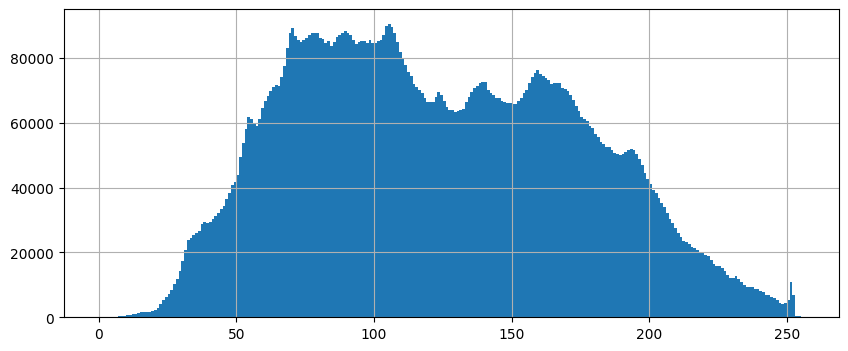

In [33]:
plt.figure(figsize=(10,4))
plt.hist(img_gray.ravel(),256,[0,256])
# plt.legend()
plt.grid()
plt.show()

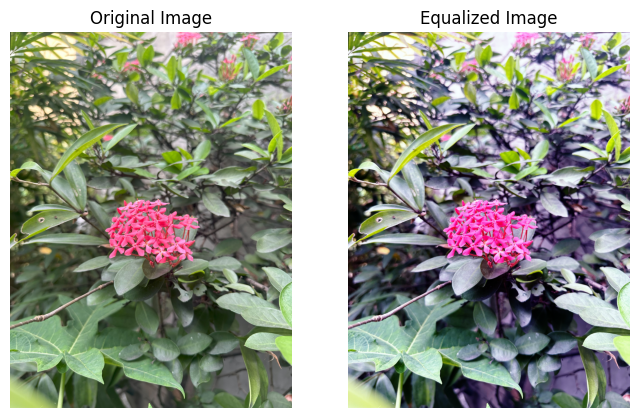

In [24]:
## Grayscale

r,g,b = cv.split(img)

img_hiseq_r = cv.equalizeHist(r)
img_hiseq_g = cv.equalizeHist(g)
img_hiseq_b = cv.equalizeHist(b)

hist_r = cv.calcHist([r],[0],None,[256],[0,256])
hist_g = cv.calcHist([g],[0],None,[256],[0,256])
hist_b = cv.calcHist([b],[0],None,[256],[0,256])

hist_eqr = cv.calcHist([img_hiseq_r],[0],None,[256],[0,256])
hist_eqg = cv.calcHist([img_hiseq_g],[0],None,[256],[0,256])
hist_eqb = cv.calcHist([img_hiseq_b],[0],None,[256],[0,256])

img_hiseq = cv.merge([img_hiseq_r,img_hiseq_g,img_hiseq_b])



plt.figure(figsize=(8,8))
plt.subplot(121), plt.imshow(img), plt.title('Original Image'), plt.axis('off'),
plt.subplot(122), plt.imshow(img_hiseq), plt.title('Equalized Image'), plt.axis('off'),
# plt.subplot(212), plt.hist(img_r.ravel(),256,[0,256], label='original'),
# plt.subplot(212), plt.hist(img_hiseq.ravel(),256,[0,256], label='equalized'),
# plt.legend()
plt.show()

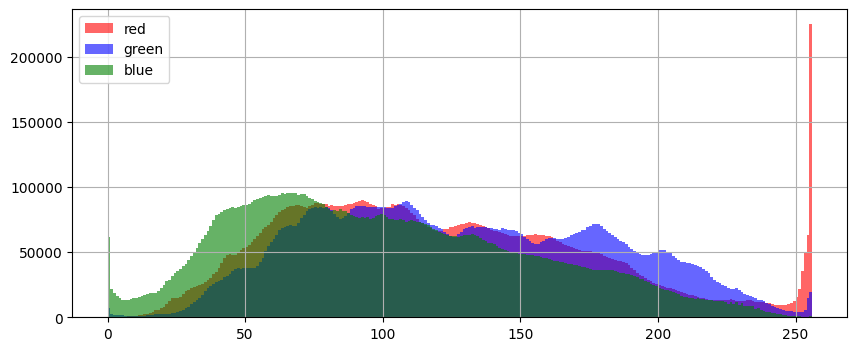

In [24]:
plt.figure(figsize=(10,4))
plt.hist(r.ravel(),256,[0,256], label='red', color='red', alpha=0.6)
plt.hist(g.ravel(),256,[0,256], label='green', color='blue', alpha=0.6)
plt.hist(b.ravel(),256,[0,256], label='blue', color='green', alpha=0.6)
plt.legend()
plt.grid()
plt.show()

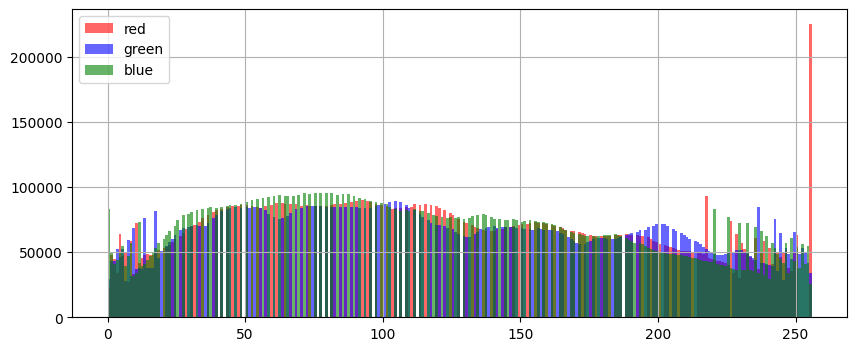

In [21]:
plt.figure(figsize=(10,4))
plt.hist(img_hiseq_r.ravel(),256,[0,256], label='red', color='red', alpha=0.6)
plt.hist(img_hiseq_g.ravel(),256,[0,256], label='green', color='blue', alpha=0.6)
plt.hist(img_hiseq_b.ravel(),256,[0,256], label='blue', color='green', alpha=0.6)
plt.legend()
plt.grid()
plt.show()

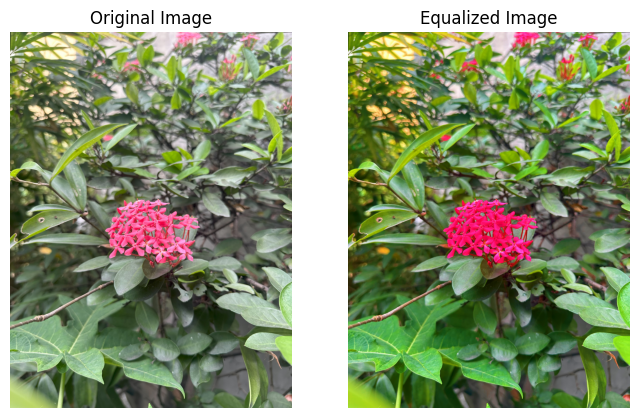

In [27]:
## HSL

h,s,l = cv.split(cv.cvtColor(img, cv.COLOR_RGB2HSV))

img_hiseq_h = cv.equalizeHist(h)
img_hiseq_s = cv.equalizeHist(s)
img_hiseq_l = cv.equalizeHist(l)

hist_h = cv.calcHist([h],[0],None,[256],[0,256])
hist_s = cv.calcHist([s],[0],None,[256],[0,256])
hist_bl = cv.calcHist([l],[0],None,[256],[0,256])

hist_eqh = cv.calcHist([img_hiseq_h],[0],None,[256],[0,256])
hist_eqs = cv.calcHist([img_hiseq_s],[0],None,[256],[0,256])
hist_eql = cv.calcHist([img_hiseq_l],[0],None,[256],[0,256])

img_hiseq = cv.cvtColor(cv.merge([h,img_hiseq_s,l]), cv.COLOR_HSV2RGB)



plt.figure(figsize=(8,8))
plt.subplot(121), plt.imshow(img), plt.title('Original Image'), plt.axis('off'),
plt.subplot(122), plt.imshow(img_hiseq), plt.title('Equalized Image'), plt.axis('off'),
# plt.subplot(212), plt.hist(l.ravel(),256,[0,256], label='original'),
# plt.subplot(212), plt.hist(hist_eql.ravel(),256,[0,256], label='equalized'),
# plt.legend()
plt.show()

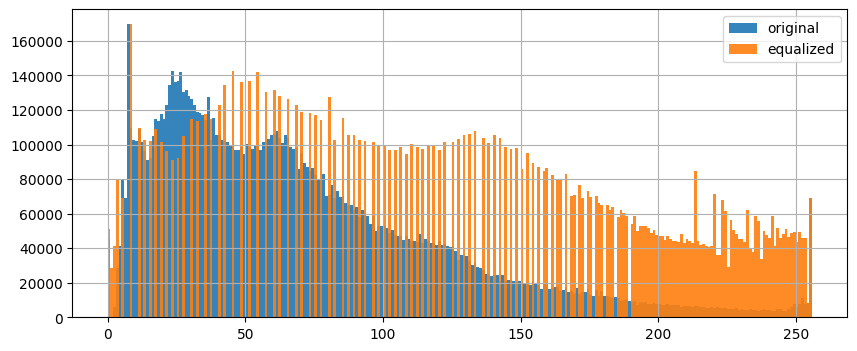

In [28]:
plt.figure(figsize=(10,4))
plt.hist(s.ravel(),256,[0,256], label='original', alpha=0.9)
plt.hist(img_hiseq_s.ravel(),256,[0,256], label='equalized', alpha=0.9)
plt.legend()
plt.grid()
plt.show()